# Nonlinear dynamics of heart and brain
Authors: _TODO: insert authors and affiliations_
1. [Max Planck Institute for Dynamics and Self-Organization Göttingen](https://www.ds.mpg.de/) 

### Table of contents <a class="anchor" id="TOC"></a>
* [Introduction](#introduction)  
* [Excitable cells and the FitzHugh Nagumo model](#excitable-cells-and-fitzhugh-nagumo-model)
   * [Action Potential Generation](#action-potential-generation)
   * [The FitzHugh Nagumo Model](#the-fitzhugh-nagumo-model)
* [Cardiac Toy Model](#cardiac-toy-model)
    * [Exercise 1](#exercise-1)
* [Brain Toy Model](#brain-toymodel)
    * [Exercise 2](#exercise-2) 
* [Synchronisation and Entropy Measures](#synchronisation-and-entropy-measures)
    * [Kuramoto Order Parameter](#kuramoto-order-parameter)
    * [Coherence](#coherence)
    * [Pattern Entropy](#pattern-entropy)
    * [Exercise 3](#exercise-3)
* [References](#references)

### Introduction <a class="anchor" id="introduction"></a>
Heart and brain are both organs that function through a collective and coordinated response of their cells, mediated by electrical signaling and activity propagation. When activated, their excitable cells can stimulate connected cells, generating specialized activity patterns that serve their distinct functions.

However, despite these similarities in their fundamental mechanics, the emergent response is quite different: 
While healthy heart function requires regular and synchronized beating to create a regular pumping output, healthy brain function requires asynchronous activity to encode information efficiently. Interestingly, while the heart functions when the cells are locally excited in synchrony, it fails when the excitation waves become irregular; conversely, asynchronous activity is a feature of healthy brain dynamics, while overly strong synchronization is associated with low information capacity and epilepsy. Thus, collective dynamics that define function in one organ define failure in the other. 

Using a nonlinear dynamics perspective [[1](https://doi.org/10.1007/978-1-4612-3118-9)]<a class="anchor" id="ref_1"></a> [[2](https://doi.org/10.1016/j.physrep.2014.05.002)]<a class="anchor" id="ref_2"></a>, [[3](https://doi.org/10.1103/RevModPhys.78.1213?_gl=1*61rq1e*_ga*MTA5NDQzODUxMC4xNzE2Mzk2ODQ2*_ga_ZS5V2B2DR1*MTczNzg5NzE1Ni40MC4wLjE3Mzc4OTcxNTYuMC4wLjI3MjM0MjI3NQ..)]  <a class="anchor" id="ref_3">   [[4](https://doi.org/10.1016/j.cnsns.2020.105275)]<a class="anchor" id="ref_4"></a> , both systems can be described to a leading order as excitable media. In an excitable medium, depending on the properties of the single cells, network structure, and coupling mechanism, either non-synchronous or synchronous dynamics can emerge. Using the same model to simulate cardiac and neural electrical activity at 
the single-cell level, we show how different parameters and couplings support 
each organ's respective function (e.g. bidirectional, spatially arranged coupling 
enables synchronized traveling waves propagation while non-local connections facilitate asynchronous dynamics). After exploring the model, we show how pathologies in one organ present 
function in the other, using the concept of phase transitions. We analise the collective dynamics in both models using synchronisation and entropy measure to show how in the brain model a healthy state correlates with low synchronisation and high entropy levels while in the heart model the opposite occurs.

## Excitable cells and FitzHugh-Nagumo model  <a class="anchor" id="Excitable-cells-and-FitzHugh-Nagumo-model"></a>
As previously mentioned, the heart and brain 
share a common foundation: the electrical dynamics of their predominant building blocks, cardiomyocytes and neurons. These are determined by the properties of the cell membrane which separates the intracellular compartment from the extracellular medium. These two environments might have different concentrations of charged ions leading to a voltage difference between them (membrane potential). 
The membrane potential can be modulated by specialized proteins embedded into the membrane that control the flow of charged ions, the most important of which are sodium, potassium, and calcium ions. These proteins take the form of ion channels, ion pumps, and ion exchangers. 
Ion channels form pores in the membrane allowing specific ions to passively flow down their electrochemical gradient. They open or close upon changes in membrane voltage (voltage-gated channels),upon binding with a ligand (ligand-gated channels), or responding to mechanical forces (mechanically-gated channels). 
In contrast, ion pumps actively transport ions against their electrochemical gradient and require ATP consumption. 
Finally, ion exchangers facilitate the movement of ions across the membrane in exchange for other ions by exploiting the energy stored in the electrochemical gradients created by ion pumps. 
The overall ion flow determined by the orchestrated opening and closing of transport proteins generates electrical currents that can lead to characteristic voltage traces - the action potentials (APs).
### Action potential generation <a class="anchor" id="Action-Potential-Generation"></a>
APs are the fundamental units of electrical signaling in both organs, coordinating cellular activity and orchestrating organ-level functions. 
Their dynamics and generation can be roughly described with the same sequence of processes in both organs. In the absence of external stimuli, the cell is in its resting state; the sodium-potassium and calcium pumps maintain the membrane potential to a negative value. These transport proteins keep a higher $Na^{+}$ and $Ca^{2+}$ concentration outside the cell and a higher concentration of $K^+$ in the intracellular environment.
If the cell receives an external stimulus crossing its excitation threshold, the voltage-gated sodium channels open. This allows the sodium ions to follow their electrochemical gradient flowing inside the cell bringing the membrane potential to a positive value (depolarisation). Subsequently, calcium channels are open increasing the intracellular $Ca^{2+}$ concentration. This rise triggers muscle contraction in the heart, neurotransmitter release and synaptic plasticity in the brain,  and gene expression in both organs. 
The membrane depolarization slowly activates the potassium channels and inactivates the sodium ones: sodium ions stop flowing inside the cells and potassium ions leave the intracellular environment. These processes result in the net accumulation of positive charges in the extracellular environment and thus repolarise the membrane potential which switches from positive to negative.  
In this phase, also known as the refractory period, further stimulation is typically unable to trigger another AP. 
Finally, the potassium channels close and ion pumps and ion exchangers restore the resting membrane potential by pumping sodium and calcium ions outside the cell. 

### The FitzHugh-Nagumo model  <a class="anchor" id="FitzHugh-Nagumo-Model"></a>

To model the electrical dynamics of both cardiomyocytes and neurons we employ the FitzHugh Nagumo  (FHN) model [[5](https://doi.org/10.1016/S0006-3495(61)86902-6)]<a class="anchor" id="ref_5 "></a> [[6](https://doi.org/10.1109/JRPROC.1962.288235)]<a class="anchor" id="ref_6 "></a>  - the simplest model describing excitable units which allows the  for recovery an action potential shape [[7](https://doi.org/10.1007/978-3-030-91032-7)]<a class="anchor" id="ref_7 "></a>. 

Given an excitable cell identified by the subscript $i$, the model characterises the changes $\frac{d}{dt}$ in its membrane potential $V_i$ and one slow recovery variable $W_i$.

<a class="anchor" id="equation_1_ff"></a>
\begin{align}
    \frac{dV_i}{dt} &= a V_i (V_i-b)(1-V_i) - W + I_i + \eta_i\\
    \frac{dW_i}{dt} &= \epsilon (V_i-W_i)
\end{align}

The membrane potential $V_i$ summarises the effects of the fast ionic currents (sodium) while the recovery variable $W_i$  summarises all the slow ionic processes (ion channel inactivation/ionic restoration). 

The parameter $b$ controls the excitation threshold needed to generate an AP: the higher $b$ is, the stronger needs to be the external input to trigger activity.

The parameter $a$ controls the sharpness and duration of the AP: as $a$ increases, the duration of the depolarisation phase increases, while the recovery period remains unchanged. 
 
The parameter $\epsilon$ determines the timescale separation between membrane potential and recovery variable. Decreasing $\epsilon$ results in a longer overall activity, lengthening both the depolarisation phase and the recovery period. 

$\eta_i$ is uncorrelated white noise with standard deviation $\sigma$.
 
Finally, $I_i$ represents the external input, typically given by the coupling with other cells and external stimuli (i.e. the planar wave initiated by pacemaker cells).

## Cardiac Toy Model <a class="anchor" id="Cardiac-Toy-Model"></a>
The heart, serving as the lifeblood of the circulatory system, pumps oxygenated blood to the body and deoxygenated blood to the lungs. 
This vital function relies on the coordinated contractions of cardiomyocytes. 
The tight local, bidirection coupling of these cells via gap junctions enables locally synchronized activation with emergent traveling waves, thereby enabling efficient pumping. 
The cell-to-cell signaling together with a long-lasting action potential ($\approx 200 $ ms) and a pronounced refractory period generates a rhythmic electrical signal setting the period heartbeats.

From a dynamic systems perspective, heart activity needs to be modeled considering the spatial dimension at its core. Hence, we model the local coupling between neighbouring cells as diiffusive coupling. We employ a discretised Laplacian based on a nine point stencil and we simulate as squared lattice with $N$ lattice sites per dimension. We define the input current of each cell of the FHN model $I_i$ as $I_i=-Dv \sum_{j} J_{ij}V_j$, where $Dv$ is the diffusion coefficient. 

The coupling matrix $J_{ij}$ is defined as $J_{ii}=-3$, $J_{ij}=0.5$ if j is nearest neighbour of $i$, $J_{ij}=0.25$ if $j$ is a diagonal neighbour of $i$, and $J_{ij}=0$ otherwise. 



Imports:

In [2]:

import matplotlib.gridspec as gridspec
import os, sys
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') 
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 
from codebase.FHN_analysis import * 
from codebase.FHN_plots import *

We initialise the cardiac toy model by setting the **organ** parameter of the **FHN_model** class to **heart** . If the parameters $a, b, e, Dv$, and sigma are not initialised in the class declaration they are set to those used in the simulations of **LINK THE PAPER**.
If not otherwise stated, N -the number of cardiomyocytes per each dimension of the squared lattice- is set to 100. The parameter $p$ correspoonds to the probability to have a defect and $p=0$ by default. The **adjacency_seed** parameter set the seed to generate a random matrix of blocking lattice sites when $p \neq 0$. More details on why we introduce blocking sites will follow later.

Since we are simulation a patch of cardiac tissue, we need to include an external stimulus that excites the cells periodically as the electrical wave generated by the pacebaker cells would. To this end, we add an external stimulus bigger than the excitation trheshold to the lattice sites on the left border of the frame at $t=0$ and then periodically with a period set by the parameter **stimulus_period**. 

The parameter **sigma** regulates the standard deviation of the noise included in the system. It is kept by default to $0.0001$ to avoid initiating noise-induced action potentials which would crete sourrces of activity other than the ones due to the propagation of the external stimulus.

In [3]:
#initialisation of the model:
# prints the parameters that can be passed to the model and their (default) values
heart_toymodel = FHN_model( 
                 N=70,
                 organ='heart',

                 adjacency_seed=1000,
                 stimulus_period=600)             

{'organ': 'heart', 'N': 70, 'a': 3, 'b': 0.05, 'e': 0.01, 'sigma': 0.0001, 'adjacency_seed': 1000, 'p': 0, 'Dv': -0.04, 'stimulus_period': 600}


In [ ]:
#Integration of the model
# n_stored_states defines the time points at which the solution is stored
# T is the duration of the simulation
heart_toymodel.run_simulation(T=1200, n_stored_states=1200)

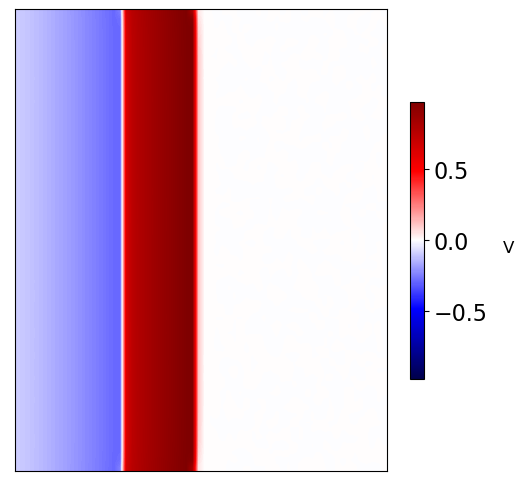

In [ ]:
#Plotting one frame of the solution of the membrane potential
#state_index is the index of the state that is plotted
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, heart_toymodel, state_index=200)

(<matplotlib.image.AxesImage at 0x2e4086c2b50>,
 <matplotlib.colorbar.Colorbar at 0x2e40b3c1610>)

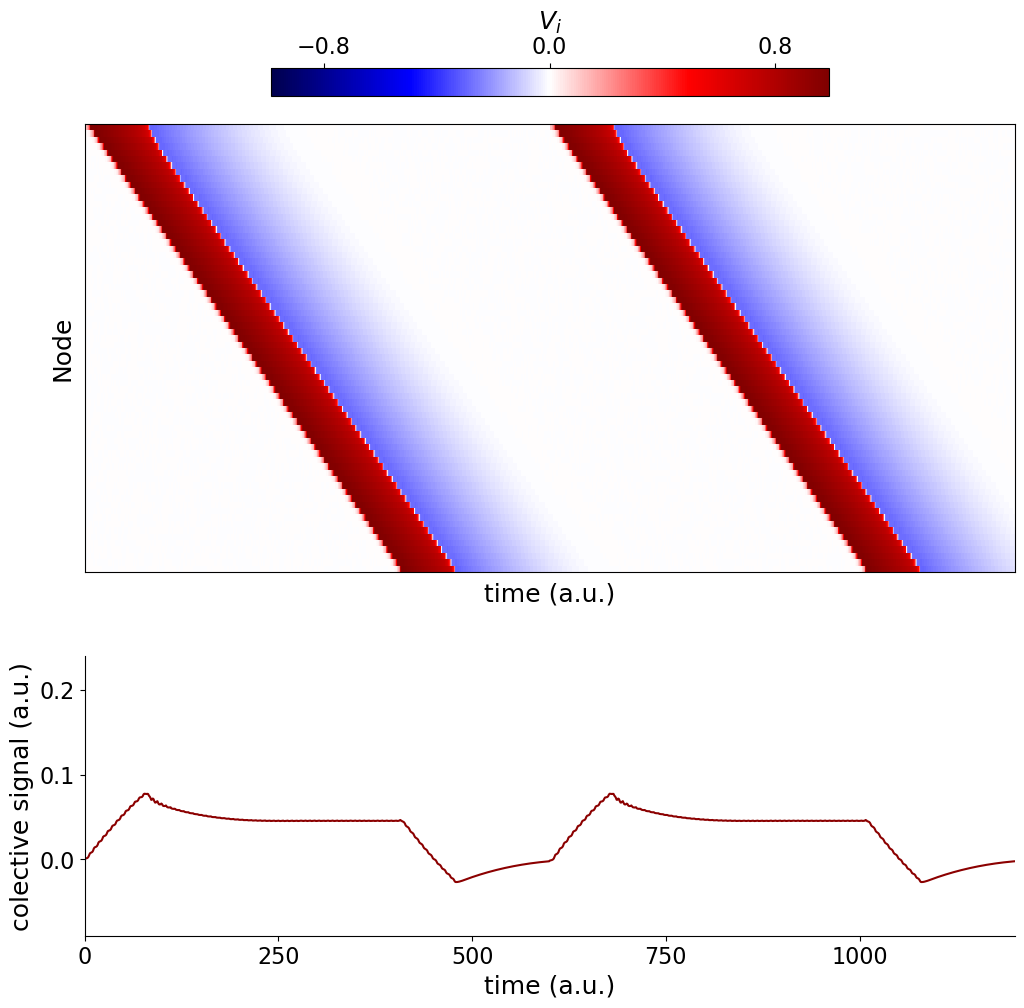

In [ ]:

#Here we plot the transmission of the signal across time over one row of the grid
#plot_from is the frame number from which the plot starts
#Moreover we plot the collective activity at each timestep given by \sum_i V_i
fig2 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig2.add_subplot(gs[0])
axcollective = fig2.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig2, axkimo, axcollective, heart_toymodel,plot_from=0)

To obtain the transition from a synchronous to an asynchronous steady state, in the cardiac toy model 
we simulate the presence of microfibrosis. Thus, we introduce blocking lattice sites with probability 
$p$ as pointwise boundaries [[8](#ref_8)]<a class="anchor" id="ref_8"></a> [[9](#ref_9)]<a 
class="anchor" id="ref_9"></a> [[10](#ref_10)]<a class="anchor" id="ref_10"></a>. To obtain normal 
sinus rhythm we set $p=0$. Around $p=0.45$ we witness the onset of arrhythmias with the creation of 
pacemaker sites within the simulation frame which interferes with the external pacing dictated by the 
sinoatrial node. Finally, for $p=0.6$ and above, we witness aystole as no electrical signal can 
propagate through the frame due to the proliferation of fibrotic sites. We can thus see what happens to the system for $p=0.5$ in terms of collective activity (NB: system size needs to be increased in order to witness reentry):

In [4]:
arrhythmia_toymodel = FHN_model( 
                  
                 organ='heart',
                 p=0.5,
                 N=150,
                 adjacency_seed=1000,
                 stimulus_period=1300)          

{'organ': 'heart', 'N': 150, 'a': 3, 'b': 0.05, 'e': 0.01, 'sigma': 0.0001, 'adjacency_seed': 1000, 'p': 0.5, 'Dv': -0.04, 'stimulus_period': 1300}


In [5]:
#Integration of the model

arrhythmia_toymodel.run_simulation(T=1300, n_stored_states=1300)

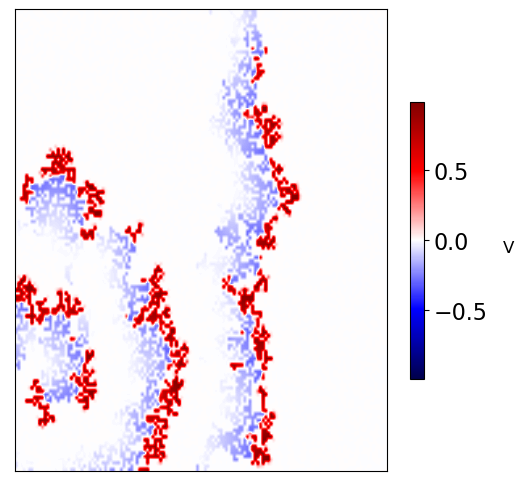

In [7]:
#Plotting one frame of the solution of the membrane potential
#state_index is the index of the frame that is plotted
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, arrhythmia_toymodel, state_index=1300)

(<matplotlib.image.AxesImage at 0x1739369c910>,
 <matplotlib.colorbar.Colorbar at 0x173937b3040>)

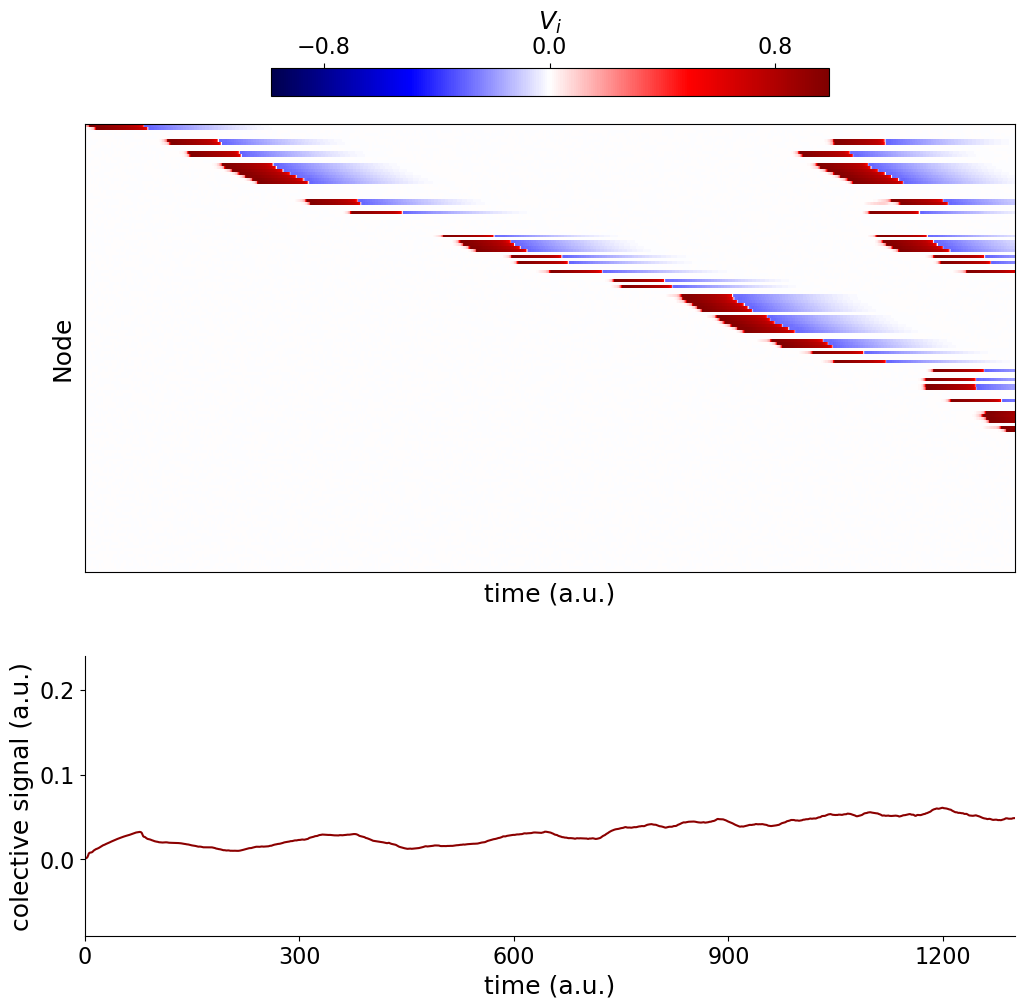

In [8]:

#Here we plot the transmission of the signal across time over one row of the grid
#plot_from is the state number from which the plot starts
#Moreover we plot the collective activity at each timestep given by \sum_i V_i
fig2 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig2.add_subplot(gs[0])
axcollective = fig2.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig2, axkimo, axcollective, arrhythmia_toymodel,plot_from=0)

### Exercise 1 <a class="anchor" id="Exercise 1"></a>
**a)** By changing the **p** parameter of the model try to get asistole. What does the collective activity look like?

**b)** Verify that for different spatial realisations of the diffuse fibrosis  (i.e. changing the **adjacency_seed** parameter of the model) the transitions to arrhythmia and to asystole happen at different values of **p**. Why is that so? Hint: plot the 2D locations of the fibrotic conduction blocks using "plt.imshow(heart_toymodel.block)".

**c)** Change the **stimulus_time** parameter of the model to increase or decrease the pacemaking period. Is there an effect on the onset of arrhythmia? How does the collective signal change?

**d)** Increase the **sigma** parameter of the model. At what value of **sigma** does the synchronised collective activity of the model for $p=0$ break? Why? Hint: **sigma** is the standard deviation of the noise and the cells are excitable...

**e)** Increase the diffusion constant $Dv$ in the arrhythmic regime. What happens in this case? Is persistent activity still generated? Why?


## Brain Toy Model <a class="anchor" id="Brain-Toy-Model"></a>

Like the heart, the brain relies on electrically excitable cells, however, in contrast to the heart, the brain's neurons should not all be active at the same time, as this presents very low information content, and even would present an epilepsy-like state. 
Instead, the brain requires distributed, de-synchronized activation of its neurons to support complex information processing. To that end, the neurons fire very short (approx 1 millisecond) action potentials (APs) that travel via a specialized network to hundreds or thousands of other neurons - which in turn are only activated if they receive sufficient APs within a short period of time, so that the summed membrane voltages crosses the neuron's firing threshold. 
This combination of short APs, relatively long conduction delays (several milliseconds), the non-local connectivity, and the threshold function for firing all support a de-synchronized activation of the neural network. Hence, altogether, the neural network is designed for distributed, asynchronous computation.

To simulate the brain's long-range connections, we use a directed Erdos-Renyi graph of fixed mean out-degree $k$. The coupling neuron $i$ with the other neuros is set to be $\frac{m}{k} J_{ij}$ where $J_{ij}$ is the adjacency matrix of the network and $m \geq 0$ sets the strength of the excitatory connections.

The variable $m$ directly determines the system's synchronisation level and is thus varied to obtain a phase transition from the healthy (asynchronous, low $m$) to pathological (synchronous, high $m$ - for default parameters around $0.1$) state. 

The parameter **sigma** corresponds again to the standard deviation of the noise in the system and is it kept to $0.50$ to ensure that noise-induced action potentials can occur: since there is no external stimulus in this case, if **sigma** is too low to cause action potentials at all the system stays silent.



In [9]:
# model initialisation
# Once again, the parameter of the FHN model are set my default to the values used in the paper
# m , if not otherwise stated, is set to 0.005 (healthy state)
# N, if not otherwise stated, is set to 1000
# sigma, if not otherwise stated, is set to 0.05
# k, if not otherwise stated, is set to 50
# The adjacency_seed sets the seed for the erdos renyi graph generation
brain_toymodel = FHN_model( 
                  
                 organ='brain',            
                

                 adjacency_seed=1000,
                 )  




{'organ': 'brain', 'N': 1000, 'a': 3, 'b': 0.2, 'e': 0.01, 'sigma': 0.1, 'adjacency_seed': 1000, 'm': 0.005, 'k': 8}


In [10]:
#Integration of the model
# n_stored_states defines the time points at which the solution is stored
# T is the duration of the simulation and is set by default to 3000
brain_toymodel.run_simulation(n_stored_states=3000)

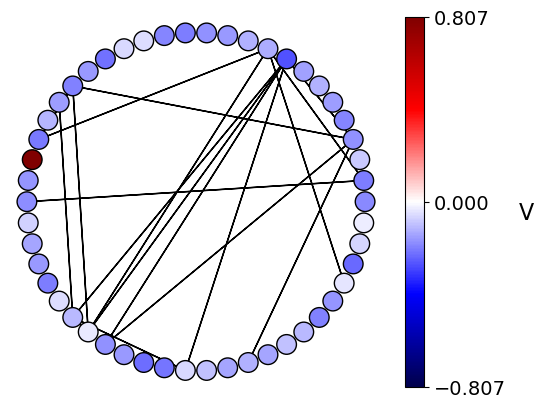

In [11]:
#Plotting one frame of the solution of the membrane potential for a subset of neurons
#neurons are plotted as equally distributed on a circle and colored acconding to their membrane potential
#The connections within neurons are plotted in black
#state_index is the index of the state that is plotted
state_index=100
fig3, ax3 = plt.subplots(figsize=(6, 6), facecolor='none')
plot_graph_on_circle(brain_toymodel.vs[state_index,:], brain_toymodel.J, ax3)

(<matplotlib.image.AxesImage at 0x2c106c6ea30>,
 <matplotlib.colorbar.Colorbar at 0x2c106be55e0>)

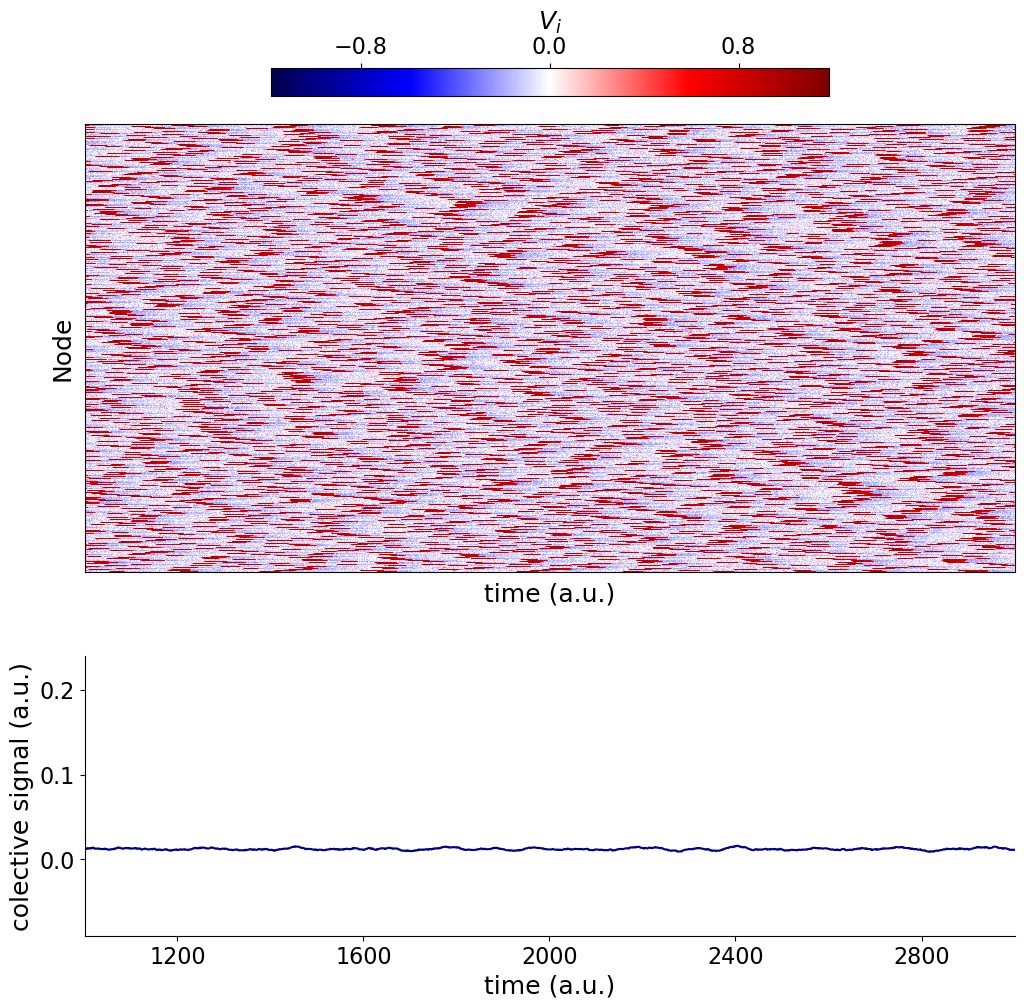

In [ ]:
#Here we plot the kymograph of the membrane potential over time
#plot_from is the index of the state at which the plot starts, corresponds to the end of equilibration
#Moreover we plot the collective activity at each timestep given by \sum_i V_i

fig4 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig4.add_subplot(gs[0])
axcollective = fig4.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig4, axkimo, axcollective, brain_toymodel)

### Exercise 2 <a class="anchor" id="Exercise 2"></a>
**a)** How does the collective activity of the healthy brain model differ from the one of the heart toy model? Why? Hint: think about the heart and the brain respective functions.

**b)** Try to get a transition from a healthy state to an epileptic-like seisure by playing around with the parameter **m** of the model. How does the collective activity look like in this case? Does it remind you some properties of the one of the healthy cardiac model?

**c)** Change the parameter of the model **k** which changes the mean degree of the network. Does the value of **m** at which the transition to synchrony occurs change as well?

**d)** Lower the value of **sigma** of one order of magnitude. What happens to the collective activity of the system?

## Synchronisation and entropy measures <a class="anchor" id="Synchronisation-and-entropy-measures"></a>

To characterise the phase transition from healthy to pathological states in both organs we employ three different order parameters:
* Kuramoto Order Parameter
* Coherence
* Pattern entropy

### Kuramoto Order Parameter <a class="anchor" id="Kuramoto-Order-Parameter"></a>

The degree of synchronisation over time is quantified using the real part of the Kuramoto order parameter [[11](https://doi.org/10.1007/BFb0013365)]<a class="anchor" id="ref_11"></a> :
\begin{align}
r(t)e^{i \psi(t)}=\frac{1}{n}\sum_{k=1}^n e^{i \theta_k(t)}.
\end{align}
The phases $\theta_k$ are calculated from the Hilbert transform $\mathcal{H}$ of $V_k$. To calculate $\mathcal{H}[V_k]$ we take the Fourier transform of $V_k$, multiply by 2 the positive frequencies, set the negative frequencies to zero and leave unchanged the zero-frequency component. The signal thus obtained is transformed back to time space obtaining the analytic signal. The imaginary part of the latter is $\mathcal{H}[V_k]$. The instantaneous phase of the signal is extracted as  $\theta_k(t)=\arctan \left(\frac{\mathcal{H}[V_k(t)]}{V_k(t)}\right)$.


By averaging over time $r(t)$ we obtain the overall degree of synchronisation: 
$R= \left \langle \frac{1}{n}\sum_{k=1}^n r_k(t)\right\rangle_t$

In the case of the cardiac toy model, for $p=0$  we expect lattice sites belonging to the same column to be perfectly synchronised. 
Indeed, they are simultaneously reached by the periodic excitation which travels horizontally. 
Hence, we quantify synchronisation column-wise obtaining: for each column $j$ we calculate $R_j=\left\langle \frac{1}{N}\sum_{k=1}^N r_k(t)\right\rangle_t$ and extract the total order parameter as $R=\frac{1}{N}\sum_{j=1}^NR_j(t)$.  

In [ ]:
# Calculation of the order parameter R for the heart model
# if p=0 it is close to 1 signaling maximum degree of synchronisation
#this corresponds to efficient blood pumping
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
#The latter is discarded in the calculation of the order parameter
kuramoto_heart= FHN_kuramoto(heart_toymodel, transient_length=100)
kuramoto_heart.kuramoto()
print(kuramoto_heart.R)

0.9934898


In [ ]:
# Calculation of the order parameter R for the brain model
#For m=0.005 it is elevated signaling a low degree of synchronisation
# This corresponds to efficient information processing
kuramoto_brain= FHN_kuramoto(brain_toymodel, transient_length=1000)
kuramoto_brain.kuramoto()
print(kuramoto_brain.R)

0.16444317


### Coherence <a class="anchor" id="Coherence"></a>

The coherence order parameter $R_V$ is calculated to quantify the degree of synchrony of the membrane voltages $V_j$  by comparing global population fluctuations to individual variability [[12](https://doi.org/10.1162/08997660151134280)]<a class="anchor" id="ref_12"></a> . 

Being $\overline{V}(t)=\frac{1}{N}=\sum_{j=1}^NV_j(t)$ the population mean and denoting by $\langle \dots\rangle$ the average over a time window then $R_V(t)$ is given by the ratio of the global variance of the population mean and the average variance within single sites: 
\begin{align}
    R_V(t)=\frac{\sqrt{\langle \overline{V}(t)^2\rangle-\langle\overline{V}(t)\rangle^2}}{\sqrt{\frac{1}{N}\sum_{j=1}^N\left(\langle V_j^2(t)\rangle -\langle V_j(t)\rangle ^2\right)}}
\end{align}
Further averaging over time we obtain a global order parameter quantifying the degree of synchrony in the system. Concerning the heart simulation, $R_V$ is calculated column by column and then averaged in accordance with the procedure for the Kuramoto order parameter.

In [ ]:
# Calculation of the coherence for the heart model
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
#The coherence is calculated of for t>transient_length
#The coherence is elevated for p=0 signaling a high degree of synchronisation
coherence_heart=FHN_coherence(heart_toymodel, transient_length=100)

coherence_heart.coherence()
print(coherence_heart.coherence)

0.6058134


In [ ]:
# Calculation of the coherence for the brain model
# The coherence is close to 0 for m=0.005 signaling a low degree of synchronisation
coherence_brain=FHN_coherence(brain_toymodel, transient_length=1000)

coherence_brain.coherence()
print(coherence_brain.coherence)

0.031758633


### Pattern Entropy <a class="anchor" id="Pattern-Entropy"></a>

We use a binary representation of the time evolution of the system to quantify entropy. 
First, we define binary activity variables $A_i(t)$ from the time evolution of each $V_i$, defining a node active when its membrane potential is larger than a threshold $V_\mathrm{thres}$ and, as a consequence, the node is in the depolarisation phase of the action potential. As $V_\mathrm{thres}$, we choose $0.08$ for the heart and $0.5$ for the brain.

Then, we consider smaller subsets of $A_i(t)$ at fixed $t$. 
For each of the subsets, we count over time the number of occurrences $n_i$ of each of the $\mathcal{N}$ possible binary patterns that it could store and define the probability of the $i^{th }$ pattern as $p_i=\frac{n_i+1}{T+\mathcal{N}}$, where $T$ is the total number of time-steps. 

This definition assumes a uniform probability distribution for the patterns which are in principle possible, but not observed, thus counteracting the bias introduced by the occurrence of only a small number of patterns. 

Finally, we quantify the uncertainty in the system by computing Shannon entropy as 

$H=-\sum_{i}p_i \log_2 (p_i)$.   

In [ ]:
# Calculation of the entropy for the heart model
# transient_length correspond to the index of the state at which equilibration end and from which we calculate the order parameter
# The entropy is low for p=0 signaling a high degree of synchronisation

entropy_heart=FHN_entropy(heart_toymodel, transient_length=100)
entropy_heart.entropy()
print(entropy_heart.entropy)

0.45139164


In [ ]:
# Calculation of the entropy for the brain model
# The entropy is high for m=0.005 signaling a low degree of synchronisation
entropy_brain=FHN_entropy(brain_toymodel, transient_length=1000)
entropy_brain.entropy()
print(entropy_brain.entropy)

0.76601875


### Exercise 3 <a class="anchor" id="Exercise 3"></a>
**a)** Calculate the order parameters for the arrhythmic heart and the epileptic brain. What is their value compared to the one of the corresponding healthy state? What's their value compared to the opposite organ's healthy state?

**b)** By carrying out other simulations around the phase transition for both organs, try to understand whether the transition is discontinuous (i.e. the other parameters "jump" from a value to another abruptly even for values of **p** or **m** very close to one another) or continuous (the order parameters increase/decrease smoothly at the transition).

**c)** What entropy value would you expect from a cardiac model in the asystole regime? Why? Check your guess.

## References <a class="anchor" id="references"></a>


[[1](#ref_1)] Glass, L., Hunter, P., & McCulloch, A. (2012). Theory of Heart: Biomechanics, Biophysics, and Nonlinear Dynamics of Cardiac Function. _Springer Science & Business Media._

[[2](#ref_2)] Qu, Z., Hu, G., Garfinkel, A., & Weiss, J. N. (2014). Nonlinear and stochastic dynamics in the heart. _Physics Reports, 543(2),_ 61–162.

[[3](#ref_3)] Rabinovich, M. I., Varona, P., Selverston, A. I., & Abarbanel, H. D. I. (2006). Dynamical principles in neuroscience. _Rev. Mod. Phys., 78,_ 1213–1265. 

[[4](#ref_4)] Barrio, R., Coombes, S., Desroches, M., Fenton, F., Luther, S., & Pueyo, E. (2020). Excitable dynamics in neural and cardiac systems. _Communications in nonlinear science & numerical simulation, 86,_ 105275.

[[5](#ref_5)] FitzHugh, R. (1961). Impulses and Physiological States in Theoretical Models of Nerve Membrane. _Biophysical Journal, 1_(6), 445–466. 

[[6](#ref_6)] Nagumo, J., Arimoto, S., & Yoshizawa, S. (1962). An Active Pulse Transmission Line Simulating Nerve Axon. _Proceedings of the IRE, 50_(10), 2061–2070.


[[7](#ref_7)] Datseris, G., & Parlitz, U. (2022). Nonlinear Dynamics: A Concise Introduction Interlaced with Code. doi:10.1007/978-3-030-91032-7

[[8](#ref_8)] Alonso, S., & Bär, M. (2013). Reentry Near the Percolation Threshold in a Heterogeneous Discrete Model for Cardiac Tissue. _Phys. Rev. Lett., 110,_ 158101.

[[9](#ref_9)] Alonso, S., Dos Santos, R. W., & Bär, M. (2016). Reentry and Ectopic Pacemakers Emerge in a Three-Dimensional Model for a Slab of Cardiac Tissue with Diffuse Microfibrosis near the Percolation Threshold. _PLOS ONE, 11_(11), e0166972.

[[10](#ref_10)] Gouvêa de Barros, B., Weber dos Santos, R., Lobosco, M., & Alonso, S. (2015). Simulation of Ectopic Pacemakers in the Heart: Multiple Ectopic Beats Generated by Reentry inside Fibrotic Regions. _BioMed Research International, 2015_(1), 713058.

[[11](#ref_11)] Kuramoto, Y. (1975). Self-entrainment of a population of coupled non-linear oscillators. In H. Araki (Ed.), _International Symposium on Mathematical Problems in Theoretical Physics_ (pp. 420–422). Berlin, Heidelberg: Springer Berlin Heidelberg.

[[12](#ref_12)] Van Vreeswijk, C., & Hansel, D. (2001). Patterns of Synchrony in Neural Networks with Spike Adaptation. _Neural Computation, 13_(5), 959–992.